### We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.
### Task:
#### 1.fitting it to the periodic function
#### 2.plot the fit
### Data
#### Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
#### Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize

C:\Users\VIJAY\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\VIJAY\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\VIJAY\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
t_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
t_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [5]:
months = np.arange(12)
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,t_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,t_min, [-40, 20, 0])

In [9]:
print(res_max)
print(res_min)

[ 39.10062829 -11.08724928   2.10332481]
[24.87112259 -7.8989966   1.60673367]


Text(0, 0.5, 'Temperature ($^\\circ$C)')

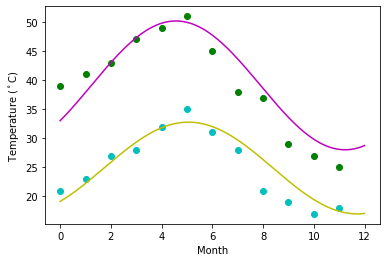

In [7]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, t_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, t_min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

## titanic
### 1. Create a pie chart presenting the male/female proportion
### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url=r'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [4]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
count=titanic['sex'].value_counts()

In [6]:
count

male      843
female    466
Name: sex, dtype: int64

Text(0.5, 1.0, 'Male/Female proportion')

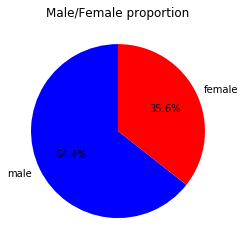

In [8]:
f, ax1 = plt.subplots()
ax1.pie(count.values.tolist(), labels=count.index.values.tolist(), colors=['b','r'],startangle=90,autopct='%.1f%%')
ax1.set_title('Male/Female proportion')

<Figure size 432x288 with 0 Axes>

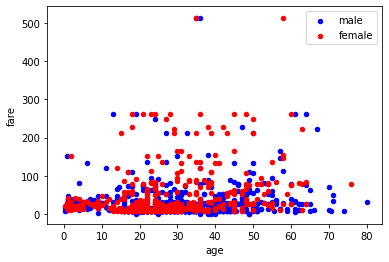

In [20]:
plt.figure()
cat1 = titanic[(titanic.sex) =='male'].plot.scatter('age','fare',colors='b',label='male')
titanic[(titanic.sex) =='female'].plot.scatter('age','fare',colors='r',label='female', ax = cat1) 